<a href="https://colab.research.google.com/github/agnes06MHN/FederatedLearning/blob/main/Copie_de_FL_d%C3%A9mo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [ ]:
import os

# Get the file path of the uploaded CSV file
file_path = os.path.join('imagesdataSet/trainLabelFinal.csv')


In [ ]:
import pandas as pd

In [ ]:

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
253,294_right,4
254,299_left,0
255,299_right,0
256,301_left,0


array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'eye'}>]], dtype=object)

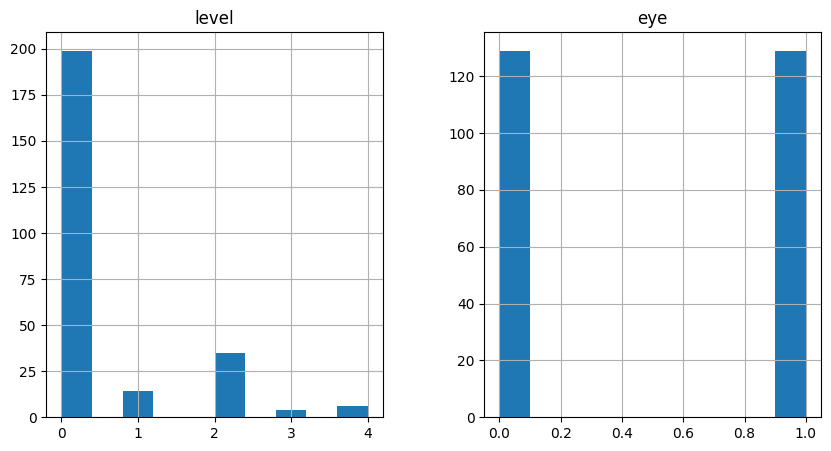

In [ ]:
df['eye'] = df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)
df[['level', 'eye']].hist(figsize = (10, 5))

New Data Size: 1500 Old Size: 1500


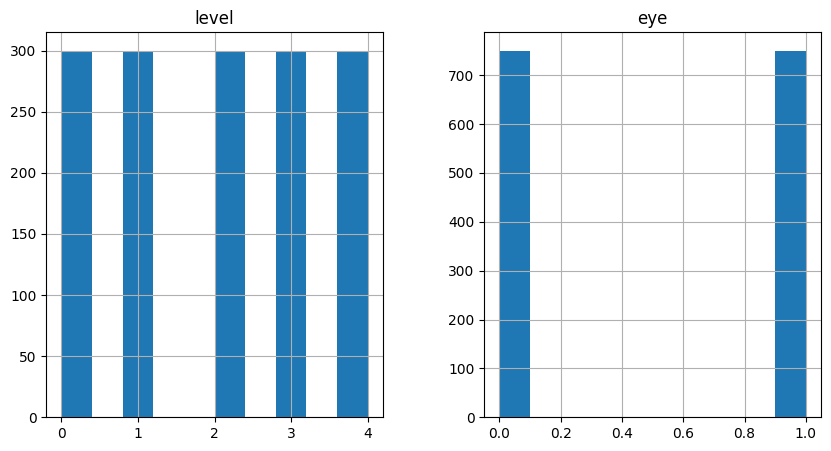

In [ ]:
df['eye'] = df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)

df = df.groupby(['level', 'eye']).apply(lambda x: x.sample(150, replace = True)).reset_index(drop = True)
print('New Data Size:', df.shape[0], 'Old Size:', df.shape[0])
df[['level', 'eye']].hist(figsize = (10, 5))

# Ensuite, continuez à utiliser df pour la suite de votre script
df['PatientId'] = df['image'].map(lambda x: x.split('_')[0])
df['path'] = df['image'].map(lambda x: os.path.join("imagesdataSet",'{}.jpeg'.format(x)))

In [ ]:
df['PatientId'] = df['image'].map(lambda x: x.split('_')[0])
df['path'] = df['image'].map(lambda x: os.path.join("imagesdataSet",'{}.jpeg'.format(x)))
df['exists'] = df['path'].map(os.path.exists)
print(df['exists'].sum(), 'images found of', df.shape[0], 'total')
df['eye'] = df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)
from keras.utils.np_utils import to_categorical
df['level_cat'] = df['level'].map(lambda x: to_categorical(x, 1+df['level'].max()))
df.dropna(inplace = True)
df = df[df['exists']]
df.sample(3)

1500 images found of 1500 total


,image,level,eye,PatientId,path,exists,level_cat
1076,99_left,3,1,99,imagesdataSet/99_left.jpeg,True,"[0.0, 0.0, 0.0, 1.0, 0.0]"
1235,16_right,4,0,16,imagesdataSet/16_right.jpeg,True,"[0.0, 0.0, 0.0, 0.0, 1.0]"
911,163_right,3,0,163,imagesdataSet/163_right.jpeg,True,"[0.0, 0.0, 0.0, 1.0, 0.0]"


In [ ]:
def load(paths, verbose=-1):
    '''expects images for each class in separate dir, 
    e.g all digits in 0 class in the directory named 0 '''
    data = list()
    # loop over the input images
    for (i, imgpath) in enumerate(paths):
        # load the image and extract the class labels
        image = cv2.imread(imgpath)  # load image in color

        # resize the image to a smaller size
        dim = (32, 32) # example of new size. Change accordingly to your needs
        image = cv2.resize(image, dim)

        image = np.array(image).flatten()
        # scale the image to [0, 1] and add to list
        data.append(image/255)
        # show an update every `verbose` images
        if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
            print("[INFO] processed {}/{}".format(i + 1, len(paths)))
    # return a tuple of the data
    return data


In [ ]:
#get the path list using the path object
image_paths = list(df['path'])

#apply our function
image_list = load(image_paths, verbose=10000)

In [ ]:

print(image_list)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00784314, 0.01176471, 0.00392157, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
       0.        ]), array([0.00784314, 0.01176471, 0.00392157, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., 

In [ ]:
#binarize the labels
lb = LabelBinarizer()
y = list(lb.fit_transform(df['level']))

In [ ]:
X = image_list
print(X)
print(y)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00784314, 0.01176471, 0.00392157, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
       0.        ]), array([0.00784314, 0.01176471, 0.00392157, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., 

In [ ]:
X

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00784314, 0.01176471, 0.00392157, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00784314, 0.01176471, 0.00392157, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.

In [ ]:
y

[array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),


In [ ]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[array([0.00392157, 0.00392157, 0.01568627, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0.00392157, 0.        , 0.00784314, ..., 0.00392157, 0.        ,
       0.00784314]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00392157, 0.00392157, 0.01568627, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.01176471, 0.        , 0.00784314, ..., 0.00392157, 0.        ,
       0.00784314]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), ar

In [ ]:
def create_clients(X, y, num_clients=3, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of images and label lists.
        args: 
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(X, y))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [ ]:
clients = create_clients(X_train, y_train, num_clients=3, initial='client')

In [ ]:
print(clients)

{'client_1': [(array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 1, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 0, 1])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 1, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 1, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 0, 1])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.

In [ ]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #separate shard into data and labels lists
    data, label = zip(*data_shard)

    # Ensure all data have the same shape
    max_len = max([len(d) for d in data])
    data = [np.pad(d, (0, max_len - len(d))) if len(d) < max_len else d for d in data]

    # Similarly for labels if necessary
    # max_len_labels = max([len(l) for l in label])
    # label = [np.pad(l, (0, max_len_labels - len(l))) if len(l) < max_len_labels else l for l in label]

    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)


In [ ]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    print(data)
    clients_batched[client_name] = batch_data(data)


[(array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 1, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
       0.00392157]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 0, 1])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 1, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 1, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 0, 1])), (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])), (array([0., 0., 0., ..., 0., 0., 0.]), array([0,

In [ ]:
from sklearn.model_selection import StratifiedKFold

class SimpleMLP:
    @staticmethod
    def build(shape, classes, optimizer='sgd', activation='relu', neurons=300):
        model = Sequential()
        model.add(Dense(200, input_shape=(shape,)))
        model.add(Activation("relu"))
        model.add(Dense(200))
        model.add(Activation("relu"))
        model.add(Dense(200))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model


In [ ]:
lr = 0.01 
comms_round = 100
loss='categorical_crossentropy'
metrics = ['accuracy']

# Define a learning rate decay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps=comms_round,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.legacy.SGD(lr=lr, momentum=0.9, decay=lr / 10)


     

In [ ]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [ ]:
clients

{'client_1': [(array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 1, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])),
  (array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
          0.00392157]),
   array([0, 1, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 0, 1])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 1, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 1, 0, 0, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 1, 0])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([0, 0, 0, 0, 1])),
  (array([0., 0., 0., ..., 0., 0., 0.]), array([1, 0, 0, 0, 0])),
  (

In [ ]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(3072,5)

In [ ]:

        
#commence global training loop
for comm_round in range(300):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(3072, 5)
        local_model.compile(loss="categorical_crossentropy", 
                      optimizer=optimizer, 
                      metrics=["accuracy"])
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

In [ ]:
X_train

[array([0.00392157, 0.00392157, 0.01568627, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157]),
 array([0.00392157, 0.        , 0.00784314, ..., 0.00392157, 0.        ,
        0.00784314]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00392157, 0.00392157, 0.01568627, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.01176471, 0.        , 0.00784314, ..., 0.00392157, 0.        ,
        0.00784314]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0.

In [ ]:
clients_batched

{'client_1': <_BatchDataset element_spec=(TensorSpec(shape=(None, 3072), dtype=tf.float64, name=None), TensorSpec(shape=(None, 5), dtype=tf.int64, name=None))>,
 'client_2': <_BatchDataset element_spec=(TensorSpec(shape=(None, 3072), dtype=tf.float64, name=None), TensorSpec(shape=(None, 5), dtype=tf.int64, name=None))>,
 'client_3': <_BatchDataset element_spec=(TensorSpec(shape=(None, 3072), dtype=tf.float64, name=None), TensorSpec(shape=(None, 5), dtype=tf.int64, name=None))>}

In [ ]:
levels = global_model.predict(clients_batched['client_3'])
predicted_levels = np.argmax(levels, axis=1)

13/13 [==============================] - 0s 4ms/step


In [ ]:
print(predicted_levels)

[0 0 4 3 4 4 0 3 3 0 3 4 2 4 4 0 2 3 1 4 4 4 2 3 1 0 4 1 1 1 4 0 3 2 0 2 0
 2 1 0 3 1 1 2 1 2 4 0 3 2 0 0 1 1 1 2 1 3 3 1 1 0 0 1 4 3 1 3 4 1 1 2 2 3
 3 2 3 2 1 4 1 4 1 3 3 3 2 2 4 1 1 3 2 0 4 4 1 1 1 2 2 1 4 4 4 0 3 2 4 1 1
 1 2 3 1 0 2 3 3 4 2 0 3 3 3 2 0 0 0 3 0 3 1 4 4 4 2 3 4 2 2 3 3 2 1 4 2 4
 0 1 3 2 3 4 1 2 4 3 0 3 0 4 0 3 2 4 0 3 2 1 4 4 4 1 1 0 2 0 4 4 0 4 2 2 3
 2 3 0 2 2 3 0 4 2 0 1 1 3 0 4 2 3 1 2 4 4 1 0 2 3 1 4 2 2 2 4 1 0 3 0 0 2
 0 0 0 3 1 4 2 0 1 0 0 2 0 4 1 3 0 0 3 2 3 3 0 3 2 0 2 0 3 2 1 3 3 3 4 2 2
 3 0 4 1 4 4 1 4 3 2 4 3 4 0 3 2 4 3 2 4 2 4 1 4 2 2 1 2 3 2 0 2 1 0 0 0 4
 0 3 3 1 1 2 4 1 1 1 0 3 4 4 1 0 1 0 3 4 2 4 1 0 1 3 3 0 4 2 1 0 1 0 2 0 3
 1 4 0 3 4 3 1 3 1 1 1 3 2 3 0 3 3 0 4 3 3 4 4 4 3 3 2 3 0 4 3 1 0 3 1 3 4
 2 4 0 1 0 0 4 0 4 3 2 3 3 4 1 2 1 2 4 1 1 4 2 0 4 3 3 1 2 3]


In [ ]:
# Convert your test data into a batched dataset
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))


In [ ]:
test_batched

<_BatchDataset element_spec=(TensorSpec(shape=(None, 3072), dtype=tf.float64, name=None), TensorSpec(shape=(None, 5), dtype=tf.int64, name=None))>

In [ ]:
#test global model and print out metrics after each communications round
for(X_test, Y_test) in test_batched:
  global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

10/10 [==============================] - 0s 4ms/step
comm_round: 299 | global_acc: 98.333% | global_loss: 0.9305058717727661


10/10 [==============================] - 0s 3ms/step


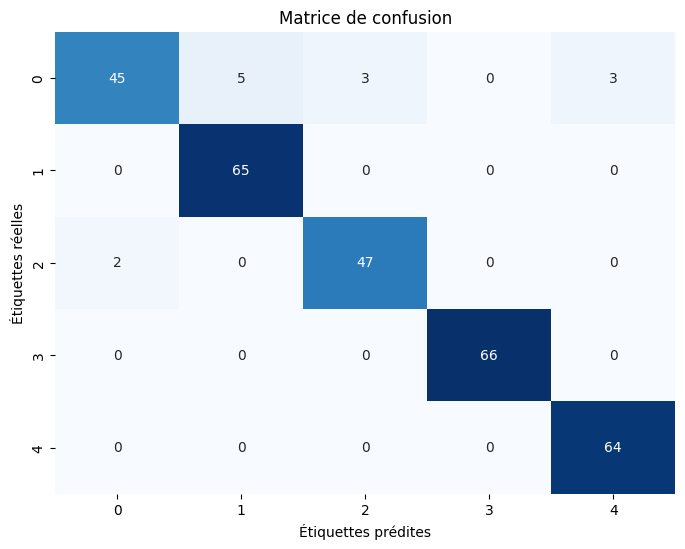

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        56
           1       0.93      1.00      0.96        65
           2       0.94      0.96      0.95        49
           3       1.00      1.00      1.00        66
           4       0.96      1.00      0.98        64

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenir les prédictions du modèle global
y_pred = np.argmax(global_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Créer une matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion')
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.show()

# Créer un rapport de classification
rapport = classification_report(y_true, y_pred)
print(rapport)


10/10 [==============================] - 0s 3ms/step


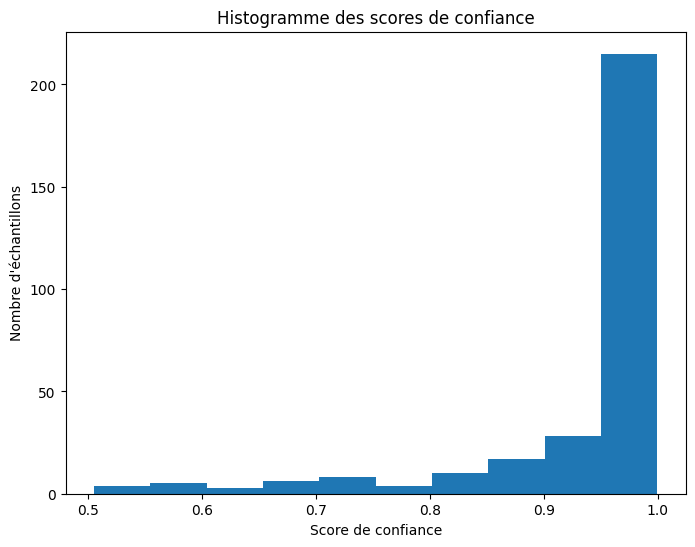

In [ ]:
from sklearn.preprocessing import label_binarize
# Histogramme des scores de confiance
class_scores = global_model.predict(X_test)
confidence_scores = np.max(class_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.hist(confidence_scores, bins=10)
plt.xlabel('Score de confiance')
plt.ylabel('Nombre d\'échantillons')
plt.title('Histogramme des scores de confiance')
plt.show()
